<a href="https://colab.research.google.com/github/drug173/Python/blob/main/Neural_Net/Test_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

#tf.test.gpu_device_name()




In [ ]:
from tensorflow import keras

from keras import distribute
from tensorflow.python.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # без этого не работает
#tf.sysconfig.get_compile_flags()

In [ ]:
import pathlib
dataset_url   ="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir   =   tf.keras.utils.get_file('flower_photos',origin=dataset_url, untar=True)


228813984/228813984 [==============================] - 3s 0us/step


In [ ]:
print(data_dir)

/root/.keras/datasets/flower_photos


In [ ]:
data_dir = pathlib.Path(data_dir)
#image_count = len(list(data_dir.glob('*/*.jpg')))
#print(image_count)

In [ ]:
#roses = list(data_dir.glob('roses/*'))
#PIL.Image.open(str(roses[0]))


In [ ]:
batch_size = 32 # размер порции данных
img_height = 170 # размер картинок
img_width = 170


train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
print(train_ds)
print(val_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 170, 170, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 170, 170, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


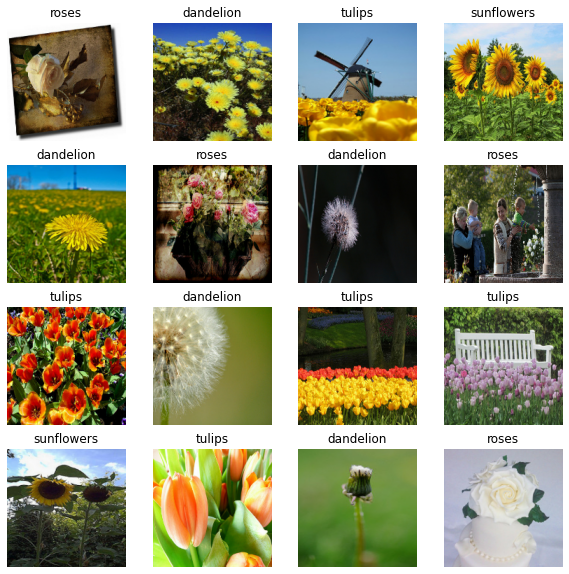

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()


In [ ]:
'''
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
''' 

'\nfor image_batch, labels_batch in train_ds:\n  print(image_batch.shape)\n  print(labels_batch.shape)\n  break\n'

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# СТАНДАРТИЗАЦИЯ
normalization_layer = layers.Rescaling(1./255)

'''
normalized_ds = train_ds.map(lambda   x,   y:
(normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

'''

'\nnormalized_ds = train_ds.map(lambda   x,   y:\n(normalization_layer(x), y))\nimage_batch, labels_batch = next(iter(normalized_ds))\nfirst_image = image_batch[0]\n# Notice the pixel values are now in `[0,1]`.\nprint(np.min(first_image), np.max(first_image))\n\n'

In [ ]:
# МОДЕЛЬ

num_classes = len(class_names)
model = Sequential([
    layers.Rescaling(1./255,   input_shape=(img_height,   img_width,3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
# Используем оптимизатор АДАМ (улучшитель градиентного спуска)
# Функция потерь
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 170, 170, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 170, 170, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 42, 42, 64)        1

In [ ]:
# обучение модели

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
92/92 [==============================] - 102s 1s/step - loss: 1.4063 - accuracy: 0.3995 - val_loss: 1.1309 - val_accuracy: 0.5708
Epoch 2/10
92/92 [==============================] - 100s 1s/step - loss: 1.0058 - accuracy: 0.5984 - val_loss: 0.9766 - val_accuracy: 0.6131
Epoch 3/10
92/92 [==============================] - 98s 1s/step - loss: 0.8197 - accuracy: 0.6887 - val_loss: 1.0046 - val_accuracy: 0.6172
Epoch 4/10
92/92 [==============================] - 93s 1s/step - loss: 0.6415 - accuracy: 0.7633 - val_loss: 0.9193 - val_accuracy: 0.6526
Epoch 5/10
92/92 [==============================] - 92s 1s/step - loss: 0.4213 - accuracy: 0.8512 - val_loss: 1.0222 - val_accuracy: 0.6431
Epoch 6/10
92/92 [==============================] - 97s 1s/step - loss: 0.2330 - accuracy: 0.9244 - val_loss: 1.2046 - val_accuracy: 0.6185
Epoch 7/10
92/92 [==============================] - 91s 996ms/step - loss: 0.1615 - accuracy: 0.9516 - val_loss: 1.3654 - val_accuracy: 0.6485
Epoch 8/10
92/9

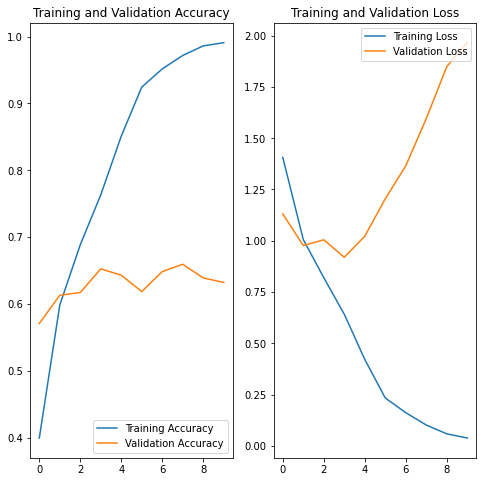

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Расширение данных

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


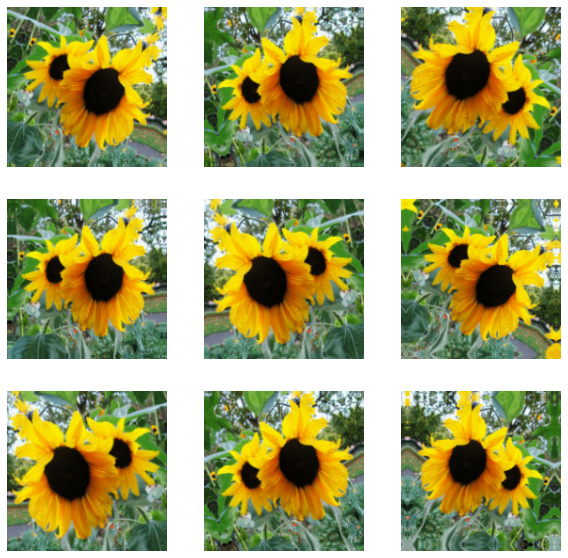

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
# ОТСЕВ
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy
(from_logits=True), metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 170, 170, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 170, 170, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 170, 170, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 85, 85, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 85, 85, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                  

In [ ]:

# ОБУЧЕНИЕ
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

  

Epoch 1/15


92/92 [==============================] - 110s 1s/step - loss: 1.2861 - accuracy: 0.4438 - val_loss: 1.1014 - val_accuracy: 0.5599
Epoch 2/15
92/92 [==============================] - 110s 1s/step - loss: 1.0031 - accuracy: 0.5988 - val_loss: 0.9543 - val_accuracy: 0.6253
Epoch 3/15
92/92 [==============================] - 105s 1s/step - loss: 0.9199 - accuracy: 0.6369 - val_loss: 0.9275 - val_accuracy: 0.6322
Epoch 4/15
92/92 [==============================] - 106s 1s/step - loss: 0.8596 - accuracy: 0.6689 - val_loss: 0.9456 - val_accuracy: 0.6471
Epoch 5/15
92/92 [==============================] - 108s 1s/step - loss: 0.8027 - accuracy: 0.6924 - val_loss: 0.8075 - val_accuracy: 0.6757
Epoch 6/15
92/92 [==============================] - 104s 1s/step - loss: 0.7462 - accuracy: 0.7108 - val_loss: 0.8314 - val_accuracy: 0.6812
Epoch 7/15
92/92 [==============================] - 109s 1s/step - loss: 0.6887 - accuracy: 0.7302 - val_loss: 0.7961 - val_accuracy: 0.7084
Epoch 8/15
92/92 [======

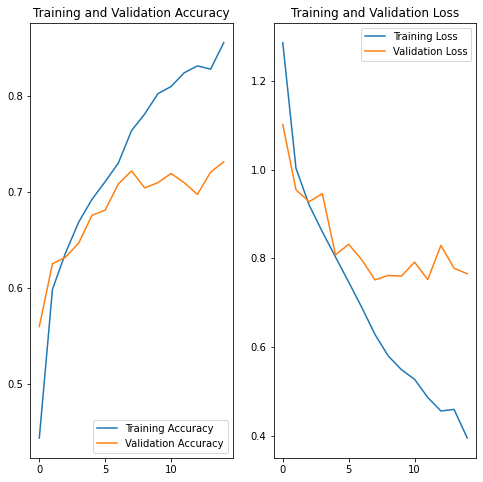

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path   =   tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

#path = pathlib.Path(sunflower_path)
print(sunflower_path)
#from IPython.display import Image, display
#display(Image(filename=path))

#Image(filename=sunflower_path) 




img = tf.keras.utils.load_img(sunflower_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score))
)

117948/117948 [==============================] - 0s 0us/step
/root/.keras/datasets/Red_sunflower
1/1 [==============================] - 0s 127ms/step
This image most likely belongs to sunflowers with a 99.20 percent confidence.
